# Walmart Sales Prediction

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Walmart_Sales.csv')

In [3]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape

(6435, 8)

In [5]:
df.size

51480

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [13]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [15]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [17]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [19]:
df.duplicated().sum()

0

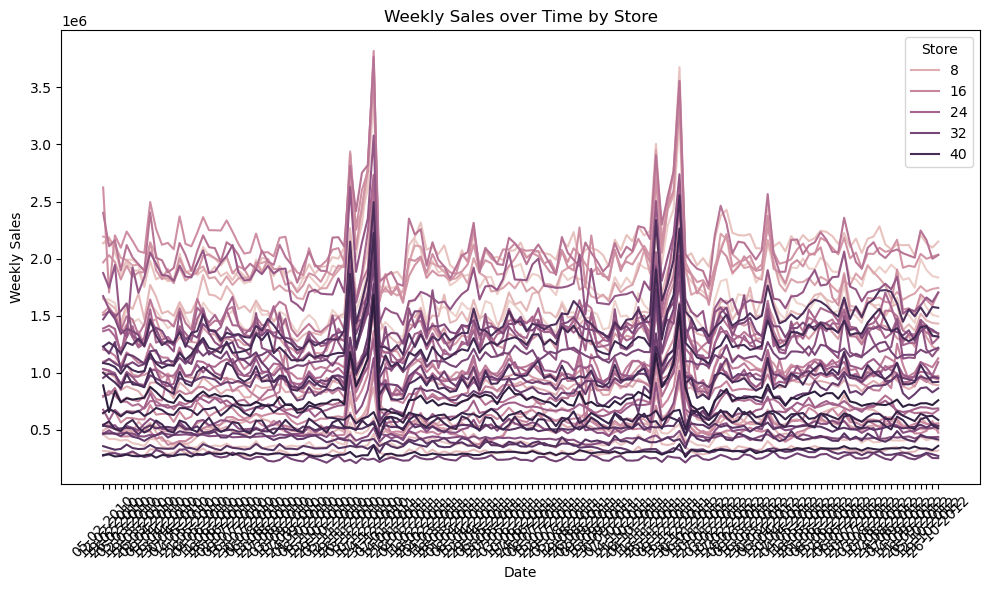

In [21]:
# Plot Weekly Sales over Date for each Store

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Weekly_Sales', hue='Store', data=df)
plt.title('Weekly Sales over Time by Store')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

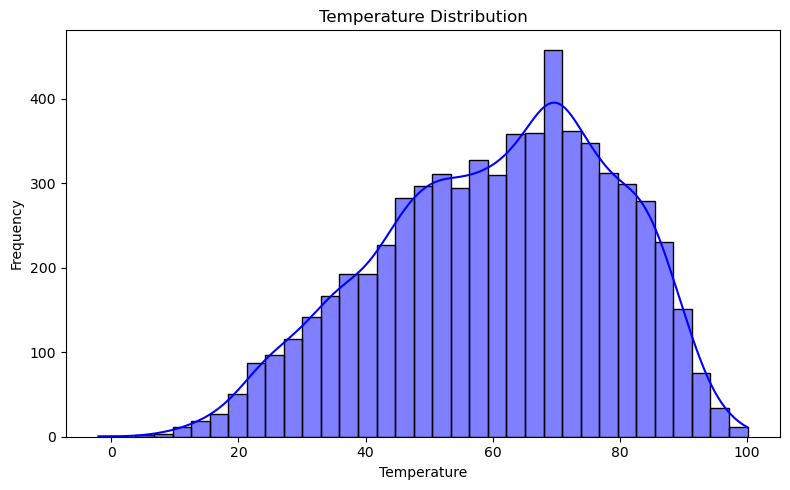

In [22]:
# Plot distribution of Temperature

plt.figure(figsize=(8, 5))
sns.histplot(df['Temperature'], kde=True, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

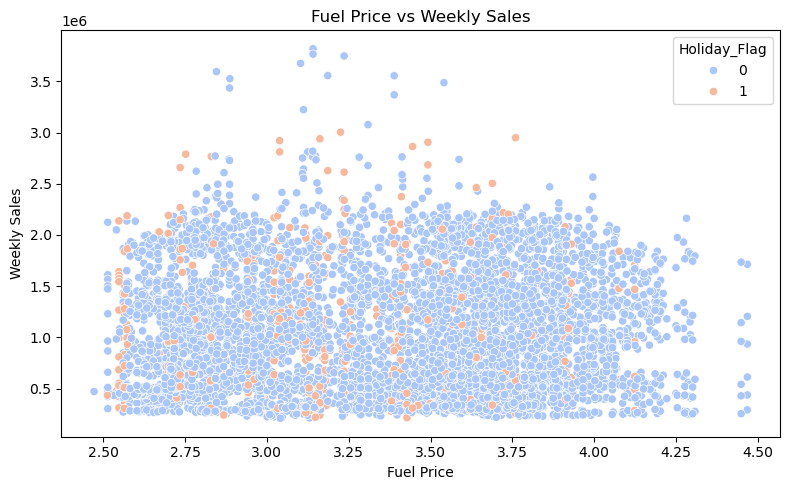

In [24]:
# Scatter plot of Fuel Price vs Weekly Sales

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, hue='Holiday_Flag', palette='coolwarm')
plt.title('Fuel Price vs Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

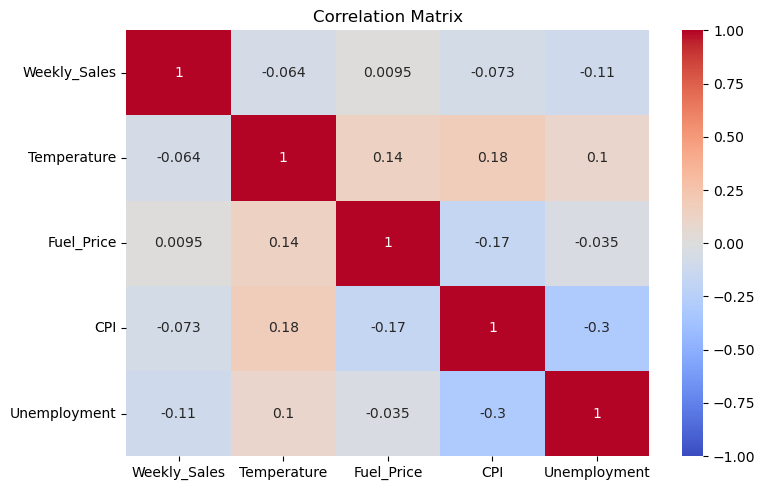

In [26]:
# Correlation heatmap for numerical columns

plt.figure(figsize=(8, 5))
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

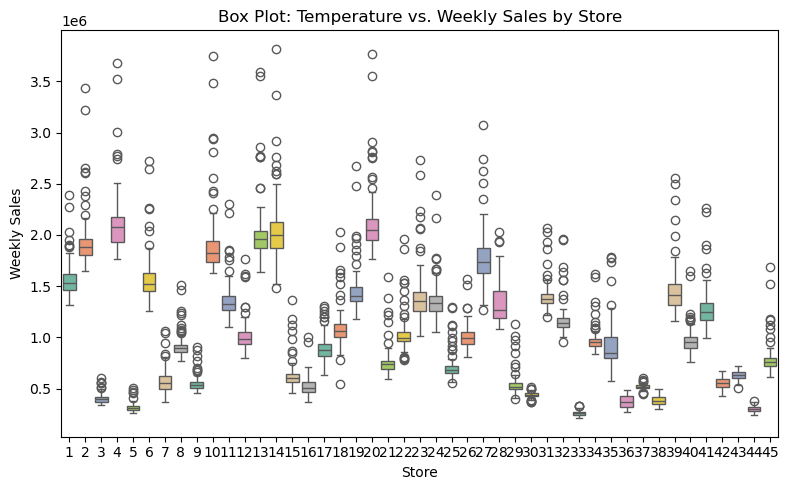

In [29]:
# Box Plot: Temperature vs. Weekly Sales by Store

plt.figure(figsize=(8, 5))
sns.boxplot(x='Store', y='Weekly_Sales', data=df, palette='Set2')
plt.title('Box Plot: Temperature vs. Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

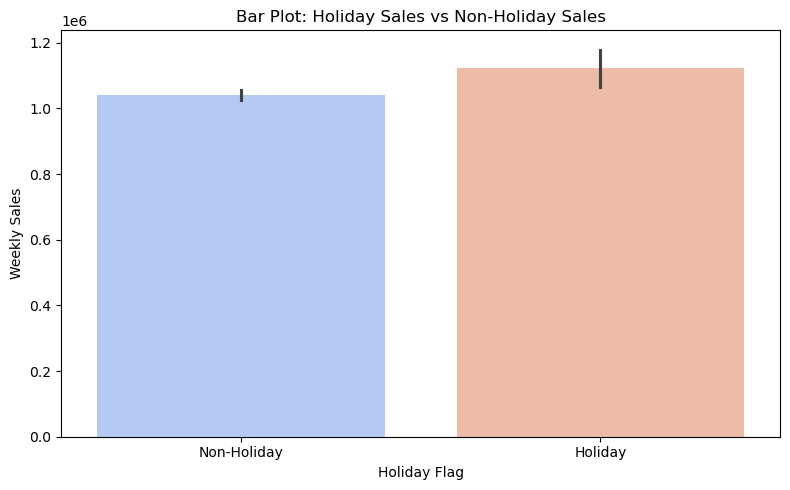

In [30]:
# Bar Plot: Holiday Sales vs Non-Holiday Sales

plt.figure(figsize=(8, 5))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df, palette='coolwarm')
plt.title('Bar Plot: Holiday Sales vs Non-Holiday Sales')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.tight_layout()
plt.show()

## Data Preprocessing

In [34]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df = df.drop(columns=['Date'])

In [36]:
df.rename(columns={'Weekly_Sales': 'Sales'}, inplace=True)

In [38]:
column_to_move = 'Sales'
df = df[[col for col in df if col != column_to_move] + [column_to_move]]

In [40]:
from sklearn.model_selection import train_test_split

X = df.drop(['Sales'], axis=1)  
y = df['Sales'] 

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [47]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [49]:
Linear_reg = LinearRegression(),
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()

In [51]:
model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost,Bagging]

Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

Score

[0.15637239067717945,
 0.9603286997384339,
 0.9404517891458772,
 0.3546311870022314,
 0.8946743361880941,
 0.9418119998278092]

## Model Evaluation

In [60]:
# R2 score

XGBoost.fit(X_train,y_train)
print("The R2 score of Random Forest : ",r2_score(y_test,XGBoost.predict(X_test)))

The R2 score of Random Forest :  0.9603286997384339


In [62]:
# Mean Squared Error (MSE) 

y_pred = XGBoost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Random Forest: ", mse)

Mean Squared Error (MSE) for Random Forest:  12780290464.21892


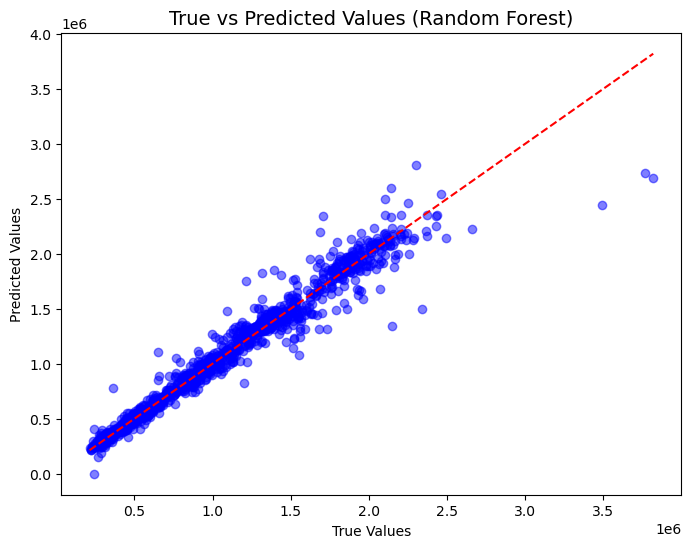

In [64]:
# Plotting True vs Predicted values

y_pred = XGBoost.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('True vs Predicted Values (Random Forest)', fontsize=14)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()